<a href="https://colab.research.google.com/github/WistonTravieso/Wiston_Travieso-Ds_Proyecto-de-Random-Forest/blob/main/src/exploratory-data-analysis.es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler


## Análisis exploratorio de datos

### Paso 1: Planteamiento del problema y recopilación de datos

Importaremos el conjunto de datos para comenzar a trabajar con él:

In [45]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"

In [46]:
total_data = pd.read_csv(url, sep=",")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Paso 2: Exploración y limpieza de datos

In [47]:
# Obtener las dimensiones
total_data.shape

(768, 9)

In [48]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
# Eliminar duplicados
total_data.duplicated().sum()

np.int64(0)

In [50]:
total_data = total_data.drop_duplicates().reset_index(drop=True)
print(total_data.shape)
total_data.head()


(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
numericals = total_data.select_dtypes(include='number').columns
numericals

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [52]:
total_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


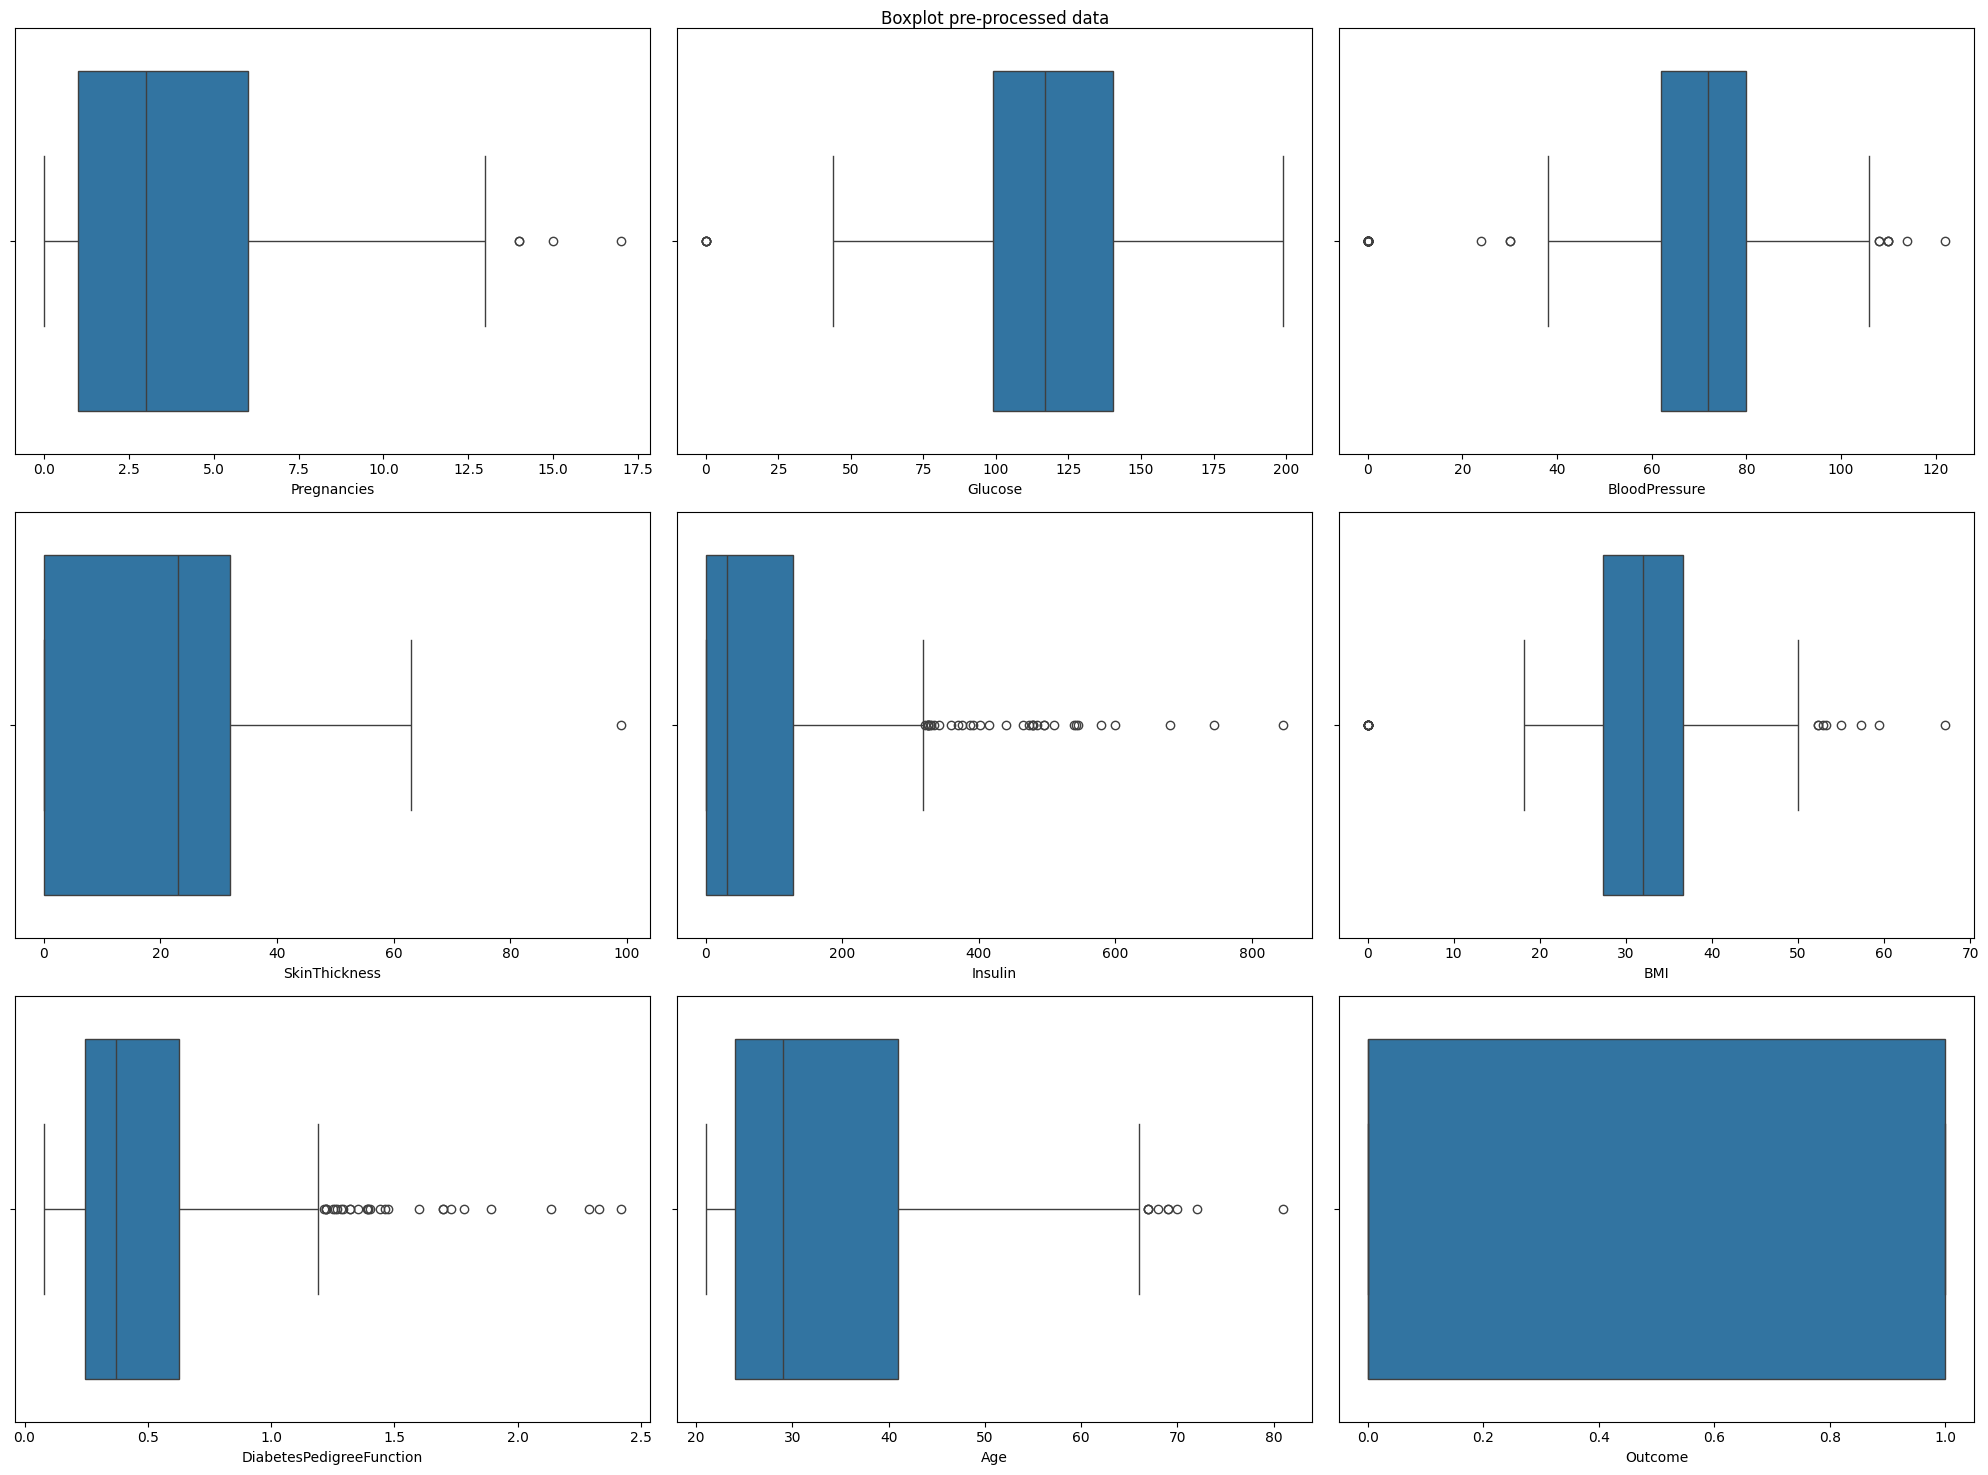

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# Visualize all column names in dataframe
column_list    = total_data.columns.tolist()
for column_name in column_list:
    print(column_name)

# Get outliers
fig, axis = plt.subplots(3,3,figsize=(20,15))
r = 0
c = 0
for col_idx in np.arange(0,len(column_list)):
    sn.boxplot(ax=axis[r,c], data = total_data, x = total_data.columns[col_idx])
    c += 1
    if c > 2:
        r += 1
        c = 0

plt.suptitle('Boxplot pre-processed data')
plt.tight_layout()
plt.show()

In [54]:
## Eliminar información irrelevante


total_data = total_data[total_data['Insulin'] <= 400]
total_data = total_data[total_data['DiabetesPedigreeFunction'] <= 1.3]

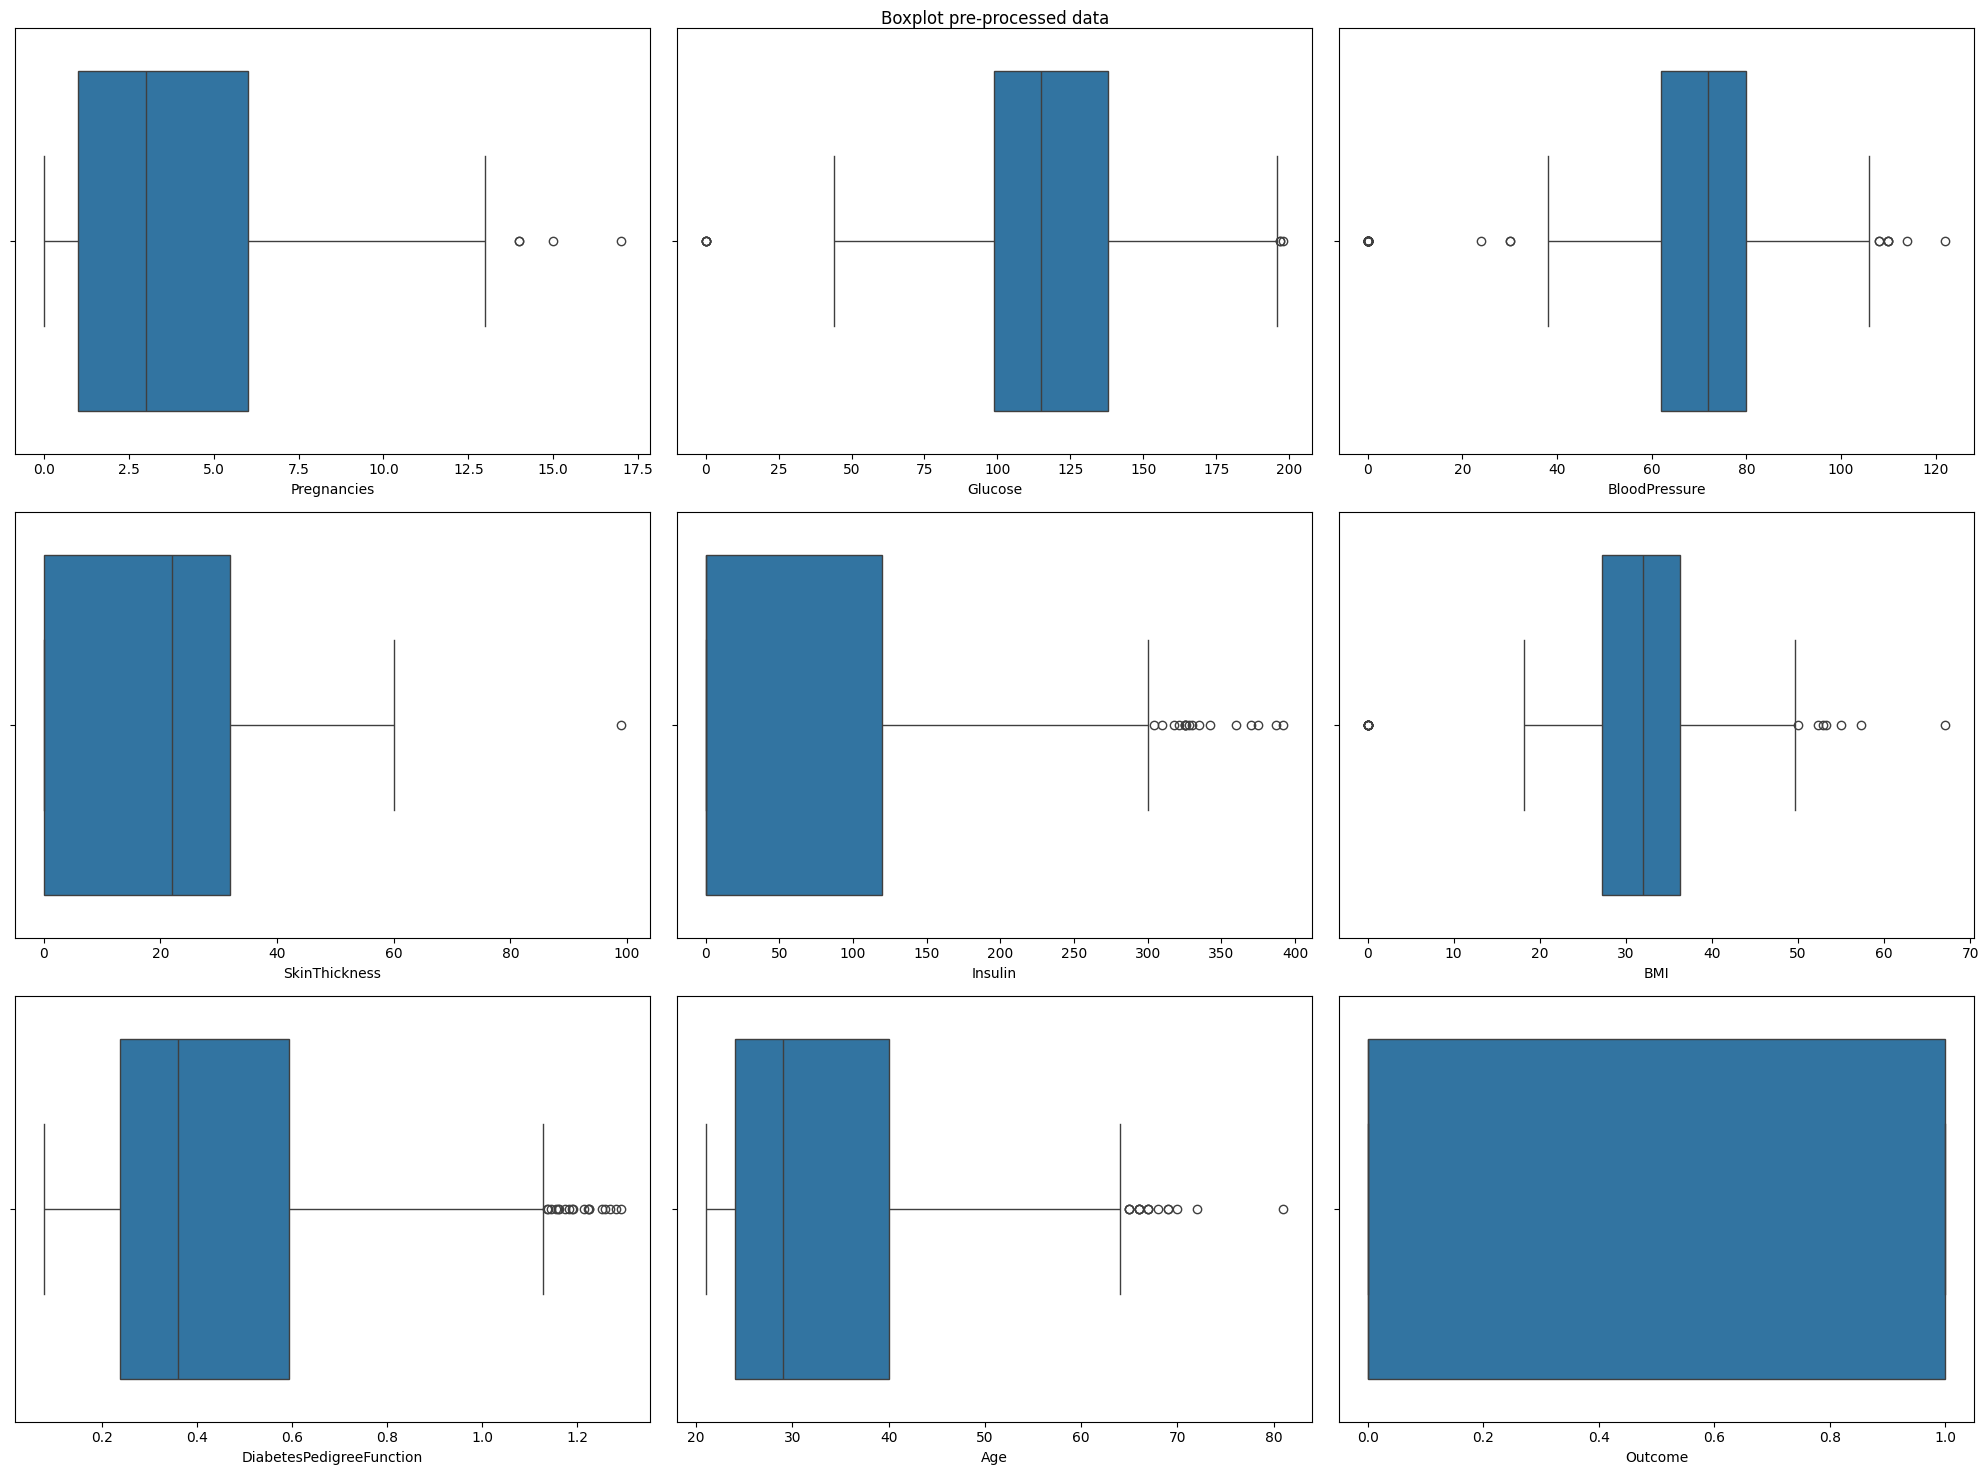

In [55]:
# Get outliers
fig, axis = plt.subplots(3,3,figsize=(20,15))
r = 0
c = 0
for col_idx in np.arange(0,len(column_list)):
    sn.boxplot(ax=axis[r,c], data = total_data, x = total_data.columns[col_idx])
    c += 1
    if c > 2:
        r += 1
        c = 0

plt.suptitle('Boxplot pre-processed data')
plt.tight_layout()
plt.show()

Paso 3: Análisis de variables

In [56]:
# Análisis de correlaciones

corr_matrix = total_data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.154908,0.143598,-0.066502,-0.070708,0.037060,-0.000196,0.540787,0.240403
Glucose,0.154908,1.000000,0.146905,0.014744,0.272532,0.193201,0.086163,0.276564,0.462854
BloodPressure,0.143598,0.146905,1.000000,0.210284,0.105725,0.284194,0.049974,0.244992,0.067943
SkinThickness,-0.066502,0.014744,0.210284,1.000000,0.474985,0.382934,0.162856,-0.111151,0.046339
Insulin,-0.070708,0.272532,0.105725,0.474985,1.000000,0.202034,0.198302,-0.079129,0.094209
BMI,0.037060,0.193201,0.284194,0.382934,0.202034,1.000000,0.144385,0.048458,0.292723
DiabetesPedigreeFunction,-0.000196,0.086163,0.049974,0.162856,0.198302,0.144385,1.000000,0.049331,0.187171
Age,0.540787,0.276564,0.244992,-0.111151,-0.079129,0.048458,0.049331,1.000000,0.240833
Outcome,0.240403,0.462854,0.067943,0.046339,0.094209,0.292723,0.187171,0.240833,1.000000


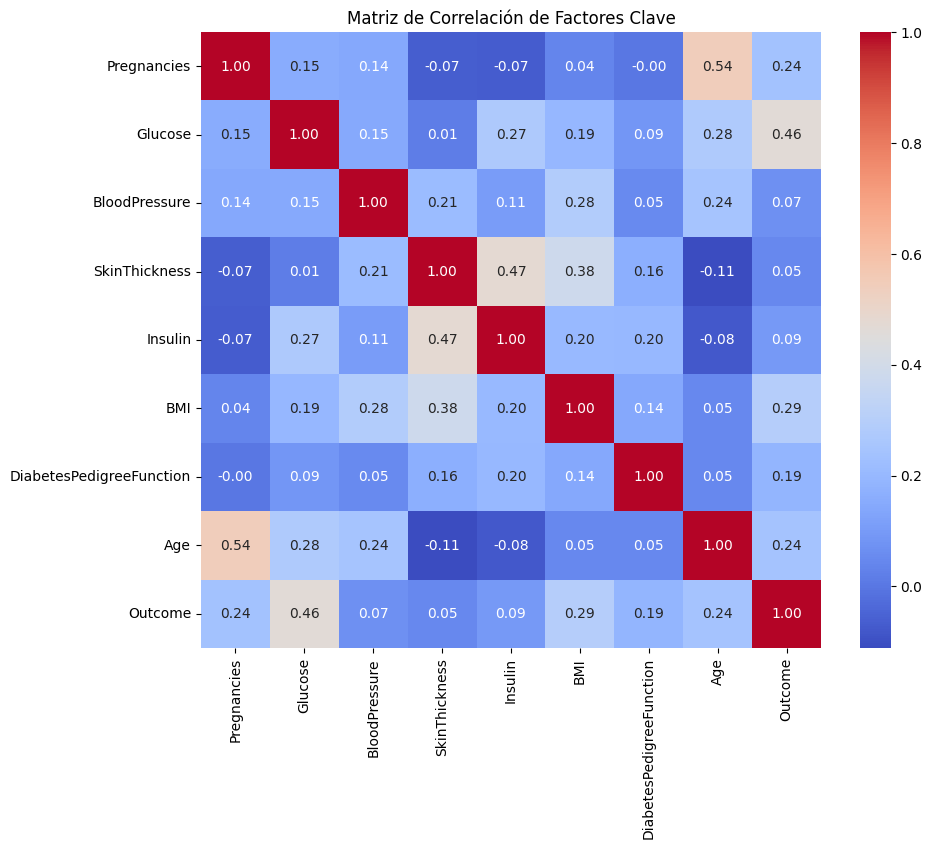

In [57]:
# # Visualización del Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Factores Clave')
plt.show()

In [58]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               730 non-null    int64  
 1   Glucose                   730 non-null    int64  
 2   BloodPressure             730 non-null    int64  
 3   SkinThickness             730 non-null    int64  
 4   Insulin                   730 non-null    int64  
 5   BMI                       730 non-null    float64
 6   DiabetesPedigreeFunction  730 non-null    float64
 7   Age                       730 non-null    int64  
 8   Outcome                   730 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 57.0 KB


In [59]:
total_data.isnull().sum().sort_values(ascending=False)

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Selección de características

In [60]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis=1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selection_model = SelectKBest(k=7)
selection_model.fit(X_train, y_train)

selected_features = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_features)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_features)

X_train_sel.head()

#

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5.0,96.0,74.0,67.0,33.6,0.997,43.0
1,1.0,125.0,50.0,167.0,33.3,0.962,28.0
2,1.0,102.0,74.0,0.0,39.5,0.293,42.0
3,8.0,120.0,0.0,0.0,30.0,0.183,38.0
4,4.0,154.0,62.0,284.0,32.8,0.237,23.0


In [61]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,81.0,72.0,76.0,30.1,0.547,25.0
1,2.0,88.0,74.0,53.0,29.0,0.229,22.0
2,0.0,124.0,70.0,0.0,27.4,0.254,36.0
3,4.0,156.0,75.0,0.0,48.3,0.238,32.0
4,1.0,88.0,78.0,76.0,32.0,0.365,29.0


In [62]:
X_train_sel['Outcome'] = y_train.values
X_test_sel['Outcome'] = y_test.values

X_train_sel.to_csv('..clean_train.csv', index=False)
X_test_sel.to_csv('..clean_test.csv', index=False)


Arbol de Decisión

In [63]:

train_data = pd.read_csv("..clean_train.csv")
test_data = pd.read_csv("..clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.0,96.0,74.0,67.0,33.6,0.997,43.0,0
1,1.0,125.0,50.0,167.0,33.3,0.962,28.0,1
2,1.0,102.0,74.0,0.0,39.5,0.293,42.0,1
3,8.0,120.0,0.0,0.0,30.0,0.183,38.0,1
4,4.0,154.0,62.0,284.0,32.8,0.237,23.0,0


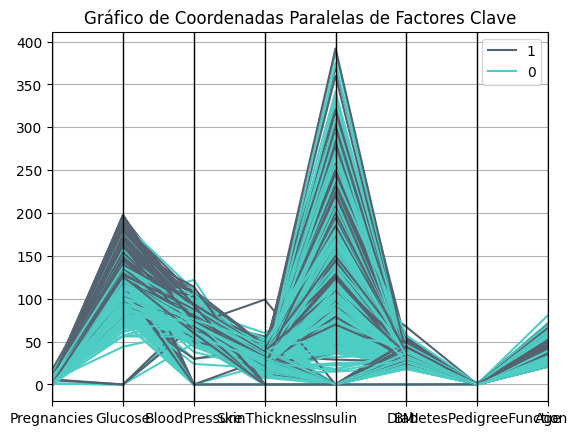

In [64]:
total_data = X
total_data['Outcome'] = y
pd.plotting.parallel_coordinates(total_data, 'Outcome', color=('#556270', '#4ECDC4'))
plt.title('Gráfico de Coordenadas Paralelas de Factores Clave')
plt.show()

<Axes: >

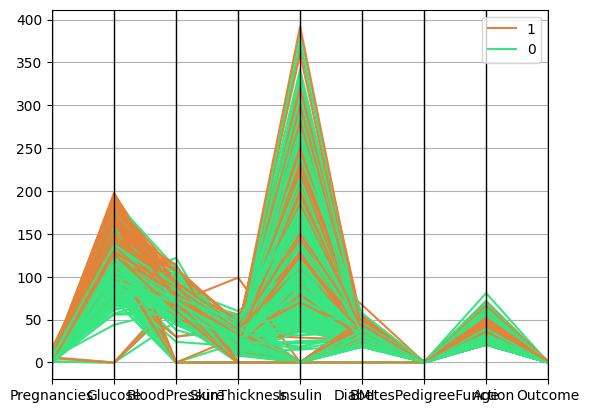

In [65]:
total_data = X
total_data["Name"] = y

pd.plotting.parallel_coordinates(total_data, "Name", color = ("#E58139", "#39E581", "#8139E5"))

In [66]:
X_train = train_data.drop("Outcome", axis=1)
y_train = train_data["Outcome"]
X_test = test_data.drop("Outcome", axis=1)
y_test = test_data["Outcome"]

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

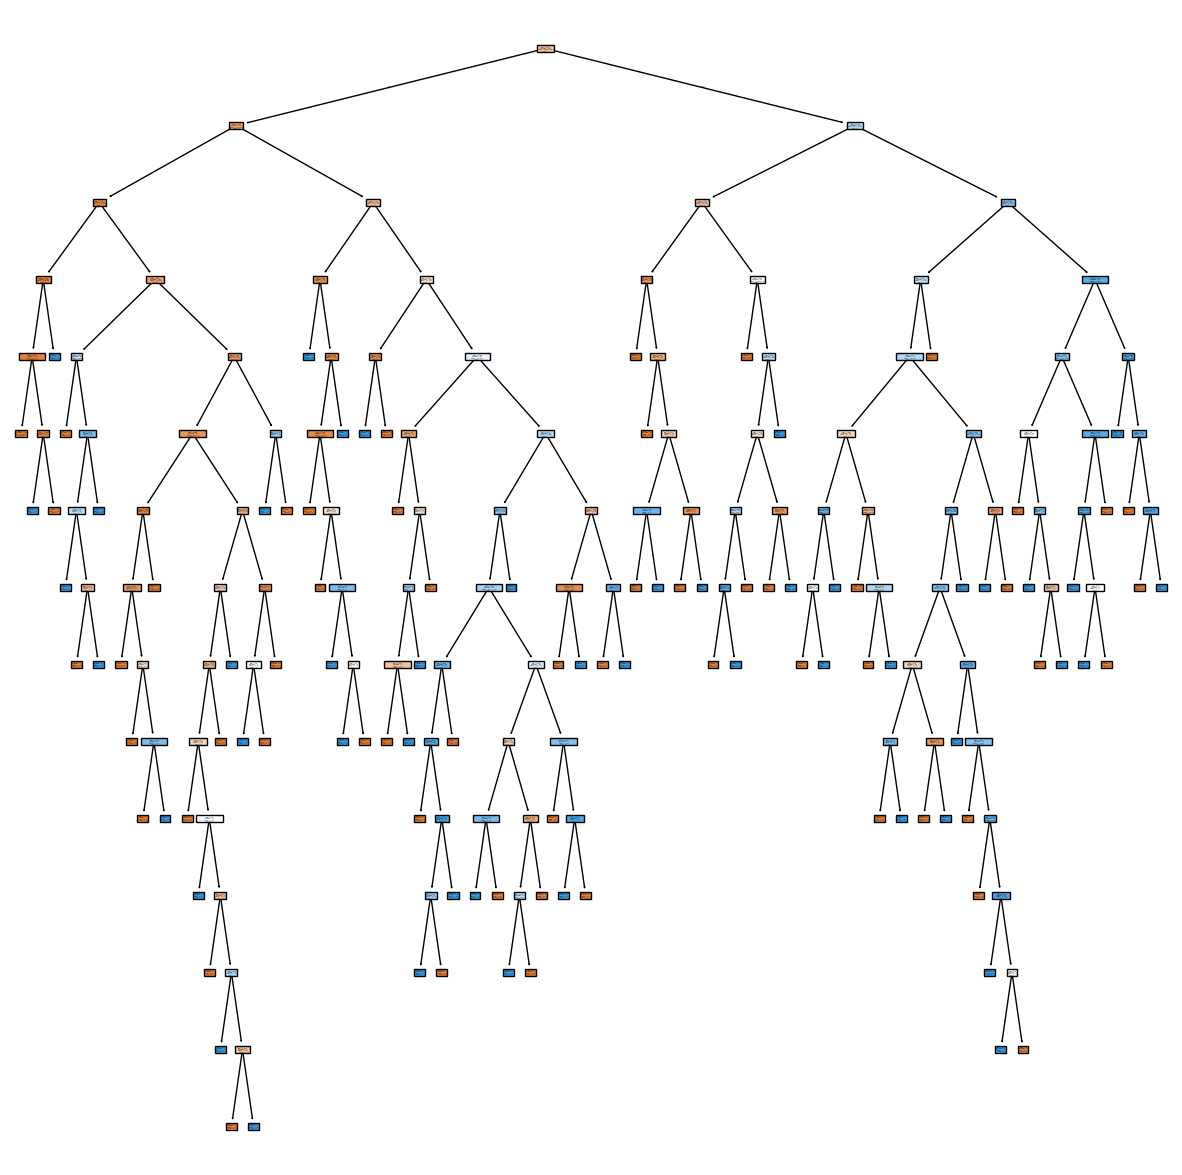

14

In [69]:
## Profundicad del árbol
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_tree, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()
model_tree.get_depth()

In [70]:
y_pred = model_tree.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test, y_pred)

0.7328767123287672

In [72]:
class_tree = classification_report(y_test, y_pred)
print(class_tree)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       101
           1       0.57      0.53      0.55        45

    accuracy                           0.73       146
   macro avg       0.68      0.68      0.68       146
weighted avg       0.73      0.73      0.73       146



# Optimización del modelo

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(model_tree, hyperparameters, cv=10 , scoring='accuracy')
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [74]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid.best_params_)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [75]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=2)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [76]:
y_pred = model_tree.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [77]:
accuracy_score(y_test, y_pred)

0.7465753424657534

# Guardado del Modelo

In [79]:
from pickle import dump

dump(model_tree, open('decision_tree_model_crit-gini_max_depth-5_min_samples_leaf-2_min_samples_split-10_42.sav', 'wb'))

# Random forests

Paso 1. Lectura del conjunto de datos procesado


In [80]:
train_data = pd.read_csv("..clean_train.csv")
test_data = pd.read_csv("..clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.0,96.0,74.0,67.0,33.6,0.997,43.0,0
1,1.0,125.0,50.0,167.0,33.3,0.962,28.0,1
2,1.0,102.0,74.0,0.0,39.5,0.293,42.0,1
3,8.0,120.0,0.0,0.0,30.0,0.183,38.0,1
4,4.0,154.0,62.0,284.0,32.8,0.237,23.0,0


In [81]:
X_train = train_data.drop("Outcome", axis=1)
y_train = train_data["Outcome"]
X_test = test_data.drop("Outcome", axis=1)
y_test = test_data["Outcome"]

X_train.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5.0,96.0,74.0,67.0,33.6,0.997,43.0
1,1.0,125.0,50.0,167.0,33.3,0.962,28.0
2,1.0,102.0,74.0,0.0,39.5,0.293,42.0
3,8.0,120.0,0.0,0.0,30.0,0.183,38.0
4,4.0,154.0,62.0,284.0,32.8,0.237,23.0


Paso 2: Inicialización y entrenamiento del modelo

In [82]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

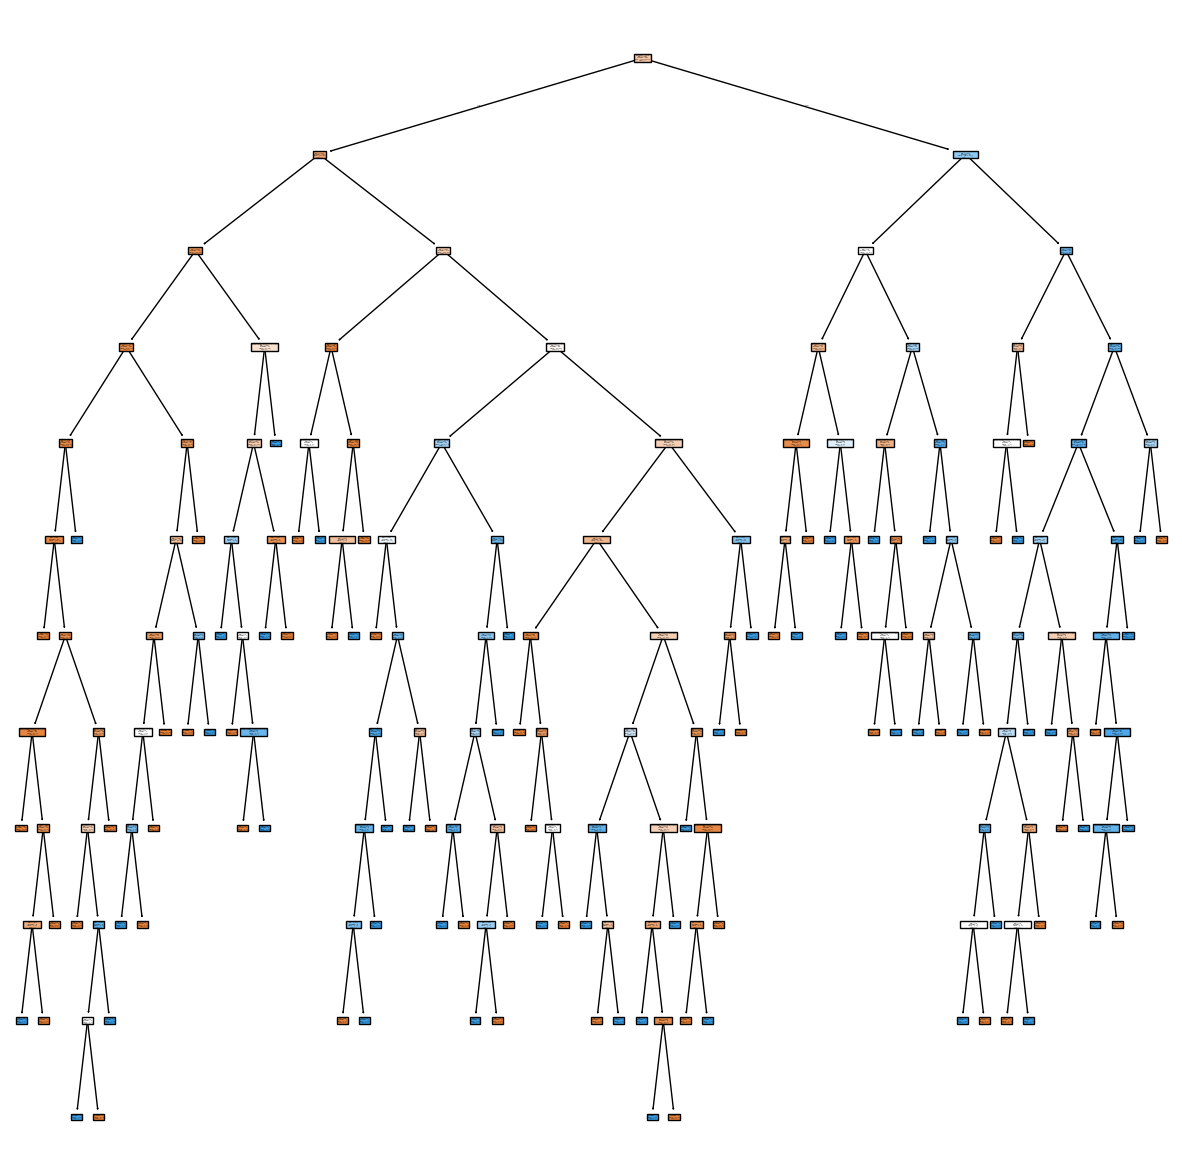

In [83]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))
# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
for i in range(4):tree.plot_tree(model.estimators_[i], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
plt.show()


Paso 3: Predicción del modelo

In [84]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [85]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test, y_pred)

0.821917808219178

Paso 4: Guardado del modelo

In [86]:
from pickle import dump

dump(model, open('random_forest_model_42.sav', 'wb'))